Data from Gálvez-Reyes et al 2021 (Mastretta-Yanes last author)

[Dispersal limitations and long-term persistence drive differentiation from haplotypes to communities within a tropical sky-island: Evidence from community metabarcoding](https://doi.org/10.1111/mec.16195)
* [pdf available from csic](https://digital.csic.es/bitstream/10261/246394/1/Dispersal-Emerson-2021-MolecularEcology.pdf)
* [Data from dryad](https://doi.org/10.5061/dryad.wh70rxwkw)
* [Scripts & metadata in github](https://github.com/AliciaMstt/Multihierarchical_NevadoToluca)

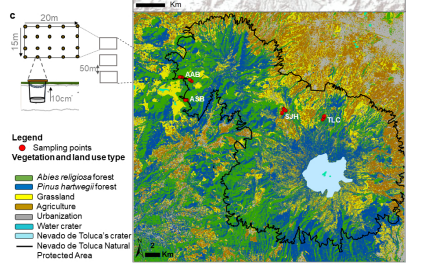

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import shutil

from collections import Counter
from itertools import combinations
from scipy.stats import entropy

import sys
sys.path.append('/home/isaac/proj/IMEMEBA-BCI')
import BCI

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)


In [7]:
metadata = pd.read_csv("./ConservationForestNevadoToluca.csv")
# Fasta sequences contain just this part of the site ID, so set the index based on this
metadata.index = [x.split("_")[-1] for x in metadata["label_mbc"]]
metadata

,id,code,label_mbc,locality,key_locality,municipality,state,natural_protected_area,key_natural_protected_area,latitude,longitude,samplig_altitude,treatment,key_treatment,Season,forest_type
31TCONS1,31,31TCONSER1,CON_NTO_TLC_31TCONS1,Tlacotepec,TLC,Santiago Tlacotepec,Estado de México,Nevado de Toluca,NTO,19.175990,-99.761725,3323,under conservation,CON,Rainy,Abies religiosa
32TCONS2,32,32TCONSER2,CON_NTO_TLC_32TCONS2,Tlacotepec,TLC,Santiago Tlacotepec,Estado de México,Nevado de Toluca,NTO,19.176833,-99.760806,3310,under conservation,CON,Rainy,Abies religiosa
33TCONS3,33,33TCONSER3,CON_NTO_TLC_33TCONS3,Tlacotepec,TLC,Santiago Tlacotepec,Estado de México,Nevado de Toluca,NTO,19.177472,-99.760750,3302,under conservation,CON,Rainy,Abies religiosa
34TCONS4,34,34TCONSER4,CON_NTO_TLC_34TCONS4,Tlacotepec,TLC,Santiago Tlacotepec,Estado de México,Nevado de Toluca,NTO,19.179472,-99.760083,3271,under conservation,CON,Rainy,Abies religiosa
35TCONS5,35,35TCONSER5,CON_NTO_TLC_35TCONS5,Tlacotepec,TLC,Santiago Tlacotepec,Estado de México,Nevado de Toluca,NTO,19.179583,-99.759667,3264,under conservation,CON,Rainy,Abies religiosa
36TCONS6,36,36TCONSER6,CON_NTO_TLC_36TCONS6,Tlacotepec,TLC,Santiago Tlacotepec,Estado de México,Nevado de Toluca,NTO,19.179056,-99.759333,3271,under conservation,CON,Rainy,Abies religiosa
37TCONS7,37,37TCONSER7,CON_NTO_TLC_37TCONS7,Tlacotepec,TLC,Santiago Tlacotepec,Estado de México,Nevado de Toluca,NTO,19.179778,-99.760028,3266,under conservation,CON,Rainy,Abies religiosa
38TCONS8,38,38TCONSER8,CON_NTO_TLC_38TCONS8,Tlacotepec,TLC,Santiago Tlacotepec,Estado de México,Nevado de Toluca,NTO,19.180361,-99.760250,3265,under conservation,CON,Rainy,Abies religiosa
39TCONS9,39,39TCONSER9,CON_NTO_TLC_39TCONS9,Tlacotepec,TLC,Santiago Tlacotepec,Estado de México,Nevado de Toluca,NTO,19.180972,-99.759167,3245,under conservation,CON,Rainy,Abies religiosa
70SHCON1,70,70SHCON1,CON_NTO_SJH_70SHCON1,San Juan Huertas,SJH,San Juan de las Huertas,Estado de México,Nevado de Toluca,NTO,19.189917,-99.808917,3298,under conservation,CON,Rainy,Abies religiosa


## Map sites to locality

In [168]:
group = metadata.groupby(["key_locality"])
sites_per_island = {island[0]: list(set(group.index)) for island, group in group}
# Fix this inconsistent one
sites_per_island["TLC"].remove("39TCONS9")
sites_per_island["TLC"].append("39TCONSER9")
#sites_per_island["Tenerife-Teno"] = ['PAS', 'COC']
#sites_per_island["Tenerife"].remove('PAS')
#sites_per_island["Tenerife"].remove('COC')
print(sites_per_island)
{x:len(y) for x, y in sites_per_island.items()}

{'AAB': ['126ACON16', '108ACON21', '106ACON19', '123ACON13', '122ACON12', '127ACON17', '120ACON10', '107ACON20', '109ACON22', '128ACON18', '125ACON15', '111ACON24', '121ACON11', '110ACON23', '124ACON14'], 'ASB': ['86ACON8', '85ACON7', '87ACON9', '84ACON6', '80ACON2', '81ACON3', '82ACON4', '83ACON5', '79ACON1'], 'SJH': ['75SHCON6', '74SHCON5', '70SHCON1', '72SHCON3', '77SHCON8', '78SHCON9', '76SHCON7', '71SHCON2', '73SHCON4'], 'TLC': ['32TCONS2', '31TCONS1', '38TCONS8', '36TCONS6', '34TCONS4', '33TCONS3', '37TCONS7', '35TCONS5', '39TCONSER9']}


{'AAB': 15, 'ASB': 9, 'SJH': 9, 'TLC': 9}

## Make a dict mapping ASV names to sequences

In [175]:
fasta_data = "./rawdata/Galvez-Reyes-2021.fasta"
seq_data = open(fasta_data).read().split()

# Clean ';size=x' from zotu names
zotus = [x[1:].split(";")[0] for x in seq_data[::2]]
# Strip trailing gaps (not sure why they are there)
# vsearch doesn't like gaps
fastas = [x.replace("-", "N") for x in seq_data[1::2]]

#seq_df = {x:y for x,y in zip(zotus, fastas)}
seq_df = pd.Series(fastas, index=zotus)
seq_df

Zotu39_P2_E02_77SHCON8_S508_N707      GACTTAATAATATAAGATTTTGATTATTACCTCCCTCCATAACCCT...
Zotu63_P1_D06_74SHCON5_S517_N703      GACTTAATAATATAAGATTTTGATTATTACCTCCCTCCATAACCCT...
Zotu140_P1_F11_78SHCON9_S508_N706     GTCTAAATAATATAAGATTTTGATTACTACCCCCCTCTCTTACCCT...
Zotu176_P1_D08_34TCONS4_S502_N705     GTCTAAATAATATAAGATTTTGATTACTACCTCCCTCTCTTACCCT...
Zotu206_P1_H01_75SHCON6_S506_N701     GTCTAAATAATATAAGATTTTGATTACTACCCCCCTCTCTTACCCT...
                                                            ...                        
Zotu53_P4_E06_120ACON10_S508_N705     GGATGAATTATCTAAGATTTTGATTACTGCCCCCCTCTTTTTTTTT...
Zotu64_P4_E06_120ACON10_S508_N705     GGATGAATTATCTAAGATTTTGATTACTGCCCCCCTCTTTTTTTTT...
Zotu49_P4_E06_120ACON10_S508_N705     GGATGAATAATCTAAGATTTTGATTACTACCCCCCTCTTTTTTTTT...
Zotu54_P4_E06_120ACON10_S508_N705     GGATGAATAATCTAAGATTTTGATTACTGCCCCCCTCTTTTTTTTT...
Zotu201_P3_G03_126ACON16_S502_N712    GCTTAAATAATATAAGCTTTTGGCTACTACCCCCTTCCTTTCTCCT...
Length: 4230, dtype: object

## Map zotus to site codes

In [177]:
from collections import defaultdict
zotus_per_site = defaultdict(lambda: [])

for zotu in seq_df.keys():
    zotus_per_site[zotu.split("_")[3]].append(zotu)
#for site, samps in gb:
    # select only the zotu columns. Cast zotu Labels as strings (to avoid auto-detecting as int64)
#    zotus_per_site[site[0]] = samps["Label"].values.astype(str)

for k, v in zotus_per_site.items():
    print(k, "\t", len(v))

77SHCON8 	 77
74SHCON5 	 65
78SHCON9 	 68
34TCONS4 	 64
75SHCON6 	 65
83ACON5 	 78
35TCONS5 	 120
38TCONS8 	 86
18IZTAC3 	 119
32TCONS2 	 135
87ACONS9 	 86
107ACON20 	 207
20MMC2 	 108
79ACON1 	 86
80ACON2 	 45
108ACON21 	 163
21MMC3 	 137
17IZPOC2 	 184
36TCONS6 	 50
126ACON16 	 70
14SHCN5C2 	 81
81ACON3 	 97
70SHCON1 	 73
33TCONS3 	 82
125ACON15 	 46
13SHC4C1 	 167
39TCONSER9 	 88
37TCONS7 	 55
15SHC6C3 	 73
109ACON22 	 62
85ACON7 	 153
128ACON18 	 76
72SHCON3 	 61
86ACON8 	 94
121ACON11 	 56
110ACON23 	 135
120ACON10 	 54
84ACON6 	 99
73SHCON4 	 15
106ACON19 	 63
76SHCON7 	 24
82ACON4 	 76
123ACON13 	 35
111ACON24 	 75
127ACON17 	 34
71SHCON2 	 145
124ACON14 	 13
16IZPOC1 	 97
31TCONS1 	 34
122ACON12 	 22
19MMC1 	 32


## Make a new fasta file for all the sequences w/in a site

In [178]:
if not os.path.exists("site_fastas"):
    os.mkdir("site_fastas")

for site, zotus in zotus_per_site.items():
    fasta_data = seq_df.loc[zotus]
    # Check fasta files should be this length
    print(site, len(fasta_data)*2)
    with open(f"site_fastas/{site}.fasta", 'w') as outfile:
        for k, v in fasta_data.items():
            outfile.write(f">{k}\n{v}\n")

77SHCON8 154
74SHCON5 130
78SHCON9 136
34TCONS4 128
75SHCON6 130
83ACON5 156
35TCONS5 240
38TCONS8 172
18IZTAC3 238
32TCONS2 270
87ACONS9 172
107ACON20 414
20MMC2 216
79ACON1 172
80ACON2 90
108ACON21 326
21MMC3 274
17IZPOC2 368
36TCONS6 100
126ACON16 140
14SHCN5C2 162
81ACON3 194
70SHCON1 146
33TCONS3 164
125ACON15 92
13SHC4C1 334
39TCONSER9 176
37TCONS7 110
15SHC6C3 146
109ACON22 124
85ACON7 306
128ACON18 152
72SHCON3 122
86ACON8 188
121ACON11 112
110ACON23 270
120ACON10 108
84ACON6 198
73SHCON4 30
106ACON19 126
76SHCON7 48
82ACON4 152
123ACON13 70
111ACON24 150
127ACON17 68
71SHCON2 290
124ACON14 26
16IZPOC1 194
31TCONS1 68
122ACON12 44
19MMC1 64


## Run BCIs

In [166]:
fastas = sorted(glob.glob("site_fastas/*.fasta"))
bcis = {}
for fasta in fastas:
    site = fasta.split("/")[1].split(".")[0]
    print(site)
    bcis[site] = BCI.BCI(data=fasta, verbose=True)
    bcis[site]._min_clust_threshold = 70
    bcis[site].run()

106ACON19
[63, 51, 45, 41, 40, 38, 35, 34, 33, 33, 32, 32, 32, 31, 29, 28, 25, 25, 23, 21, 18, 16, 13, 11, 10, 6, 5, 4, 4, 3]
107ACON20
[207, 136, 110, 101, 94, 90, 89, 86, 81, 80, 75, 73, 70, 66, 56, 51, 50, 42, 39, 35, 30, 25, 22, 18, 15, 11, 9, 7, 7, 5]
108ACON21
[163, 121, 90, 73, 66, 60, 56, 56, 54, 53, 51, 48, 42, 41, 37, 34, 30, 26, 24, 23, 19, 19, 16, 15, 15, 12, 10, 8, 5, 3]
109ACON22
[62, 37, 30, 30, 27, 27, 27, 27, 26, 26, 26, 23, 22, 21, 21, 20, 19, 17, 17, 15, 15, 12, 8, 4, 4, 4, 4, 4, 4, 3]
110ACON23
[135, 83, 66, 64, 64, 61, 59, 58, 57, 57, 56, 56, 56, 53, 49, 45, 44, 38, 36, 34, 30, 26, 20, 15, 13, 8, 8, 7, 3, 3]
111ACON24
[75, 52, 37, 35, 34, 34, 34, 34, 34, 34, 33, 33, 32, 30, 29, 27, 25, 23, 22, 22, 20, 18, 16, 14, 10, 7, 6, 6, 6, 5]
120ACON10
[54, 36, 32, 29, 28, 27, 27, 27, 27, 27, 26, 26, 26, 26, 24, 23, 21, 20, 18, 18, 18, 18, 15, 13, 10, 9, 8, 7, 3, 3]
121ACON11
[56, 50, 45, 44, 44, 43, 43, 43, 42, 42, 41, 41, 40, 39, 38, 34, 32, 29, 28, 26, 23, 22, 17, 14, 12, 

## Lump all sites together per island

In [183]:
if os.path.exists("island_fastas"):
    shutil.rmtree("island_fastas")
if not os.path.exists("island_fastas"):
    os.mkdir("island_fastas")

for island, sites in sites_per_island.items():
    island = island.replace(" ", "_")
    fasta_out = f"island_fastas/{island}.fasta"
    # Standardize sampling to 8 random sites per island
    for site in np.random.choice(sites, 8, replace=False):
        zotus = zotus_per_site[site]
        fasta_data = seq_df.loc[zotus]
        with open(fasta_out, 'a') as outfile:
            for k, v in fasta_data.items():
                outfile.write(f">{k}\n{v}\n")

In [184]:
island_fastas = sorted(glob.glob("island_fastas/*.fasta"))
island_bcis = {}
for fasta in island_fastas:
    island = fasta.split("/")[1].split(".")[0]
    print(island)
    island_bcis[island] = BCI.BCI(data=fasta, verbose=True)
    island_bcis[island]._min_clust_threshold = 70
    island_bcis[island].run()

AAB
[609, 356, 300, 266, 251, 238, 229, 222, 215, 211, 204, 200, 188, 176, 155, 136, 123, 107, 94, 88, 73, 65, 51, 41, 30, 24, 18, 15, 10, 9]
ASB
[629, 413, 355, 333, 323, 308, 300, 293, 289, 285, 274, 260, 240, 224, 206, 180, 150, 134, 117, 96, 80, 70, 59, 46, 35, 28, 25, 18, 13, 11]
SJH
[528, 318, 282, 256, 247, 235, 229, 226, 221, 216, 206, 199, 183, 174, 157, 138, 126, 108, 100, 85, 68, 57, 49, 42, 33, 28, 22, 19, 16, 12]
TLC
[632, 344, 291, 277, 270, 260, 255, 252, 248, 241, 230, 221, 210, 194, 181, 158, 143, 123, 109, 95, 77, 65, 51, 49, 38, 31, 28, 23, 19, 17]


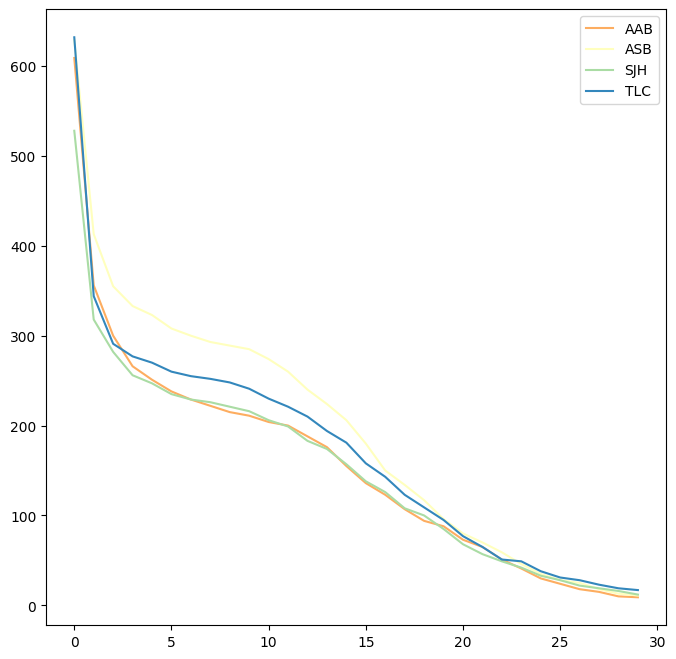

In [198]:
fig, ax = BCI.plot_multi([bci for bci in island_bcis.values()],
               log=False, normalize=False)

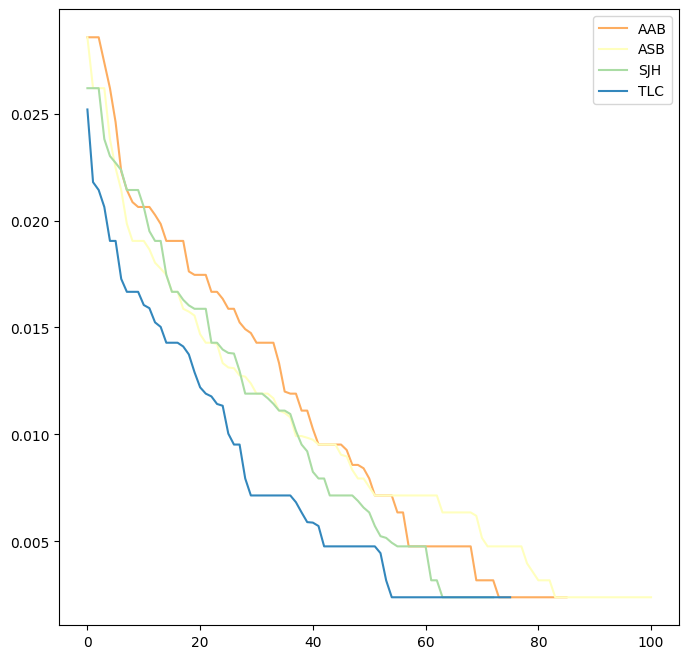

In [197]:
fig, ax = BCI.plot_multi([bci for bci in island_bcis.values()],
               log=False, normalize=False, plot_pis=True)